# Machine Learning with Iris flower data set & Python's sckit-learn


The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is composed of 4 variables (aka features) & 1 label (type of flower).

## 1. Importing dataset

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()

let's check the names of the feature & target (ie; label)

In [46]:
print iris.feature_names
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


We can see that we have 4 features & 3 target labels:

In [47]:
len(iris.feature_names), len(iris.target_names)

(4, 3)

In [48]:
print iris.data[0]

[ 5.1  3.5  1.4  0.2]


If we look at the target values we see that there are 3 digits 0, 1, & 2: 

In [49]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We know that there are three labels but which is which? Checking the dataset at Wikipedia tells us that the first entry is a 'I. setosa' (hence label 0). Similarly, 1 represents 'I. versicolor' and 2 represents 'I. virginica'.

## 2. Classified training

We now perform the usual practice of splitting the dataset into two parts, a training dataset usually 25-30%, and a testing dataset usually 65-70% of the original dataset. We'll go wih 30% and 70%.

In [50]:
import numpy as np
from sklearn import tree

The dataset as you can see on Wikipedia is composed of 50 observations per label. We extract this from the dataset and assign it to `nl`:

In [51]:
nl = len(iris.target[iris.target == 0]) # 50

In [52]:
n = int(nl * 0.3); # number of observations to use for test data (30% of 50)

# indices of observations to use for test dataset
test_indx = range(0,n) + range(50,50+n) + range(100,100+n)

We now delete the observations corresponding to these indices from each of the target and data columns and assign the result to the training datasets.

In [53]:
# training data
train_target = np.delete(iris.target, test_indx)
train_data = np.delete(iris.data, test_indx, axis = 0)

To form the testing data we need the obervations corresponding to those indice:

In [54]:
# testing data
test_target = iris.target[test_indx]
test_data = iris.data[test_indx]

Next we train the classifier:

In [55]:
clf = tree.DecisionTreeClassifier() # clf for short
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## 3. Label prediction of test data

We now feed the test data (predictors) into the decision tree and get back the (predicted) test labels:

In [56]:
clf.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

If we look at the original test labels we find they are the same:

In [57]:
test_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

An easier way to check is with a conditional statment which shows us that the predicted and original labels are the same:

In [58]:
clf.predict(test_data) == test_target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## 4. Visualizing the decision tree
Decision trees are very useful in making decisions and best of all is that they can be visualized showing us how the classifier works.
This requires `pydot` and `Graphviz` to be installed. With Anaconda under Ubuntu:

In [59]:
# in terminal:
# conda install pydot
# sudo apt-get install graphviz

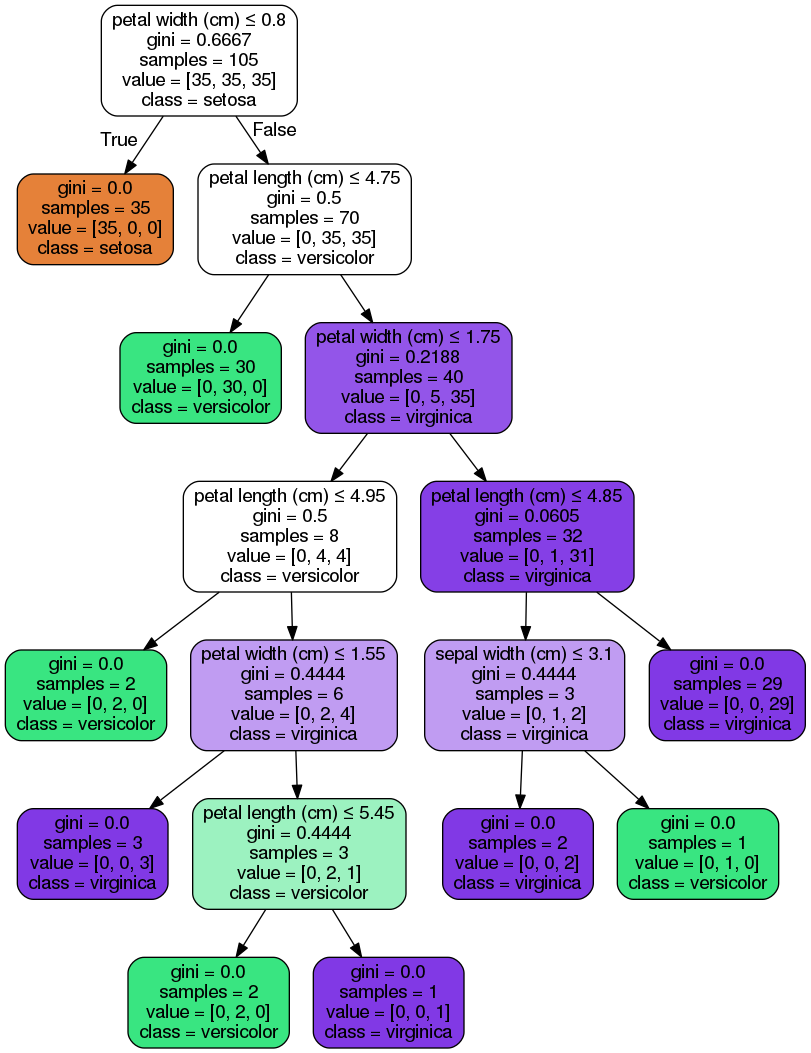

In [60]:
# code borrowed scikit learn website
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## How does a decision tree work?
In this case, it starts by checking if the petal width if less than or equal to 0.8 If it is the tree predicts it belongs to the `setosa` class. Otherwise, it ass if  the petal length is less than or equaal to 4.75. If it is it assigns it as a `versicolor`, otherwise a `virginica`. .
This is summarized in the first three levels of the above decision tree.

### Examples
* For the first prediction we see that it was assigned as a setosa (label 0) since the petal width is 0.2 < 0.8.

In [61]:
print iris.feature_names, iris.target_names
print test_data[0], test_target[0]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2] 0


* For the 20th prediction it was assigned as a `versicolor` since the petal width is 1.3 > 0.8 (hence not a `setosa`) and the petal length is 4.5 < 4.75.

In [62]:
print iris.feature_names, iris.target_names
print test_data[20], test_target[20]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[ 5.7  2.8  4.5  1.3] 1


* For the 40th prediction it was assigned as a `virginica` since the petal width is 2.0 > 0.8 (hence not a `setosa`) and the petal length is 5.1 > 4.75. At this point it could be either a veriscolor or a virginica. The decision tree keeps going through these branches until it reaches a decision and hence a prediction. I leave the rest to you for this case.

In [63]:
print iris.feature_names, iris.target_names
print test_data[40], test_target[40]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[ 6.5  3.2  5.1  2. ] 2


## Notes
* Feature selection (and engineering) is vital in decision trees and machine learning in general.

## Resources
* https://en.wikipedia.org/wiki/Decision_tree_learning 
* https://en.wikipedia.org/wiki/Predictive_analytics